In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Root finding

In [4]:
x = np.linspace(0,4.2,100)

In [5]:
def func2a(x):
    """
    roots are at x = 1, 2 and 3
    """
    return x**3-6*x**2+11*x-6

def func2b(x):
    return np.tan()

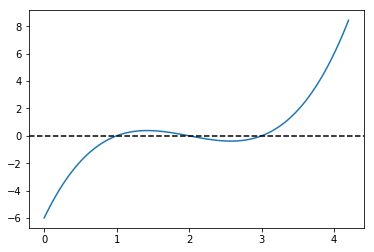

In [6]:
fig, ax = plt.subplots()
ax.plot(x,func2a(x))
ax.axhline(y=0,xmin=0,xmax=1,ls='dashed',color='k')
plt.show()

In [7]:
def bisection_method(func, lower, upper, acc, MAX=50):
    
    ylower, yupper = func(lower), func(upper)

    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")

    for i in range(MAX):
        # split bracket in half
        mid = (upper+lower)/2
#         print (i, mid)
        ymid = func(mid)
        # check if in lower or upper bracket
        if ylower * ymid <= 0:
            # lower bracket
            upper = mid
        else: 
            # its in upper bracket
            lower = mid
            
        if abs(upper-lower) < acc:
            break
            
    return lower,upper, i+1 

In [8]:
def secant_method(func, lower, upper, acc, MAX=50):
    """
    Fit secant lines through two points to approximate the root
    
    func -- function to approximate the root of
    lower -- first abcissa point of initial guess 
    uppper -- second abcissa point of initial guess 
    acc -- target accuracy
    MAX -- maximum number of iterations before function stops
    
    Returns
    x1,x2 -- two points that bracket the root
    i+1   -- number of iterations done
    """
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
        
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values
        x1 = x2
        x2 = x3
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1

In [9]:
def false_position(func, lower, upper, acc, MAX=100):
    """
    Same as secant, but recent points are the ones that
    bracket the root
    """
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower
    
    for i in range(MAX):        
        # new value
        x3 = x1 - ( func(x1)*(x1-x2)  / (func(x1) - func(x2)) )
        # update values, most recent guess is two values that bracket
        if func(x3)*func(x2) <= 0: 
            # if new point has different sign, then update last point
            x1 = x2
        else:
            x1 = x1
        x2 = x3
        
        if abs(x1 - x2) < acc:
            break
        
    return x1, x2, i+1

In [10]:
def brents_method(func, lower, upper, acc, MAX=100):
    ylower, yupper = func(lower), func(upper)
    
    if ylower * yupper >= 0:
        raise ValueError("Incorrect starting bracket")
    # smallest function value is 'most recent' guess = x2
    if abs(ylower) <= abs(yupper):
        x2 = lower
        x1 = upper
    else:
        x2 = upper
        x1 = lower 
    x3 = x1
    for i in range(MAX):
        print ("TODO")
        
    
    

In [11]:
acc = 1e-5
func2 = func2a

xlower, xupper, itneeded = bisection_method(func2, 2.5,4.0,acc)
print ('===========')
print (f'Bisection method, x between {xlower},{xupper}')
print (f'Mean: {(xlower+xupper)/2}')
print (f'Accuracy: {acc}, Number of iterations needed: {itneeded}')
print ('===========')

xlower, xupper, itneeded = secant_method(func2, 2.5,4.0,acc)
print ('===========')
print (f'Secant method, x between {xlower},{xupper}')
print (f'Mean: {(xlower+xupper)/2}')
print (f'Accuracy: {acc}, Number of iterations needed: {itneeded}')
print ('===========')

xlower, xupper, itneeded = false_position(func2, 2.5,4.0,acc)
print ('===========')
print (f'False position, x between {xlower},{xupper}')
print (f'Mean: {(xlower+xupper)/2}')
print (f'Accuracy: {acc}, Number of iterations needed: {itneeded}')
print ('===========')



Bisection method, x between 2.999998092651367,3.0000038146972656
Mean: 3.0000009536743164
Accuracy: 1e-05, Number of iterations needed: 18
Secant method, x between 3.000003738249954,2.9999999978820466
Mean: 3.0000018680660006
Accuracy: 1e-05, Number of iterations needed: 12
False position, x between 2.999999999999999,3.0
Mean: 2.9999999999999996
Accuracy: 1e-05, Number of iterations needed: 85


## Sorting

In [33]:
def selection_sort(arr):
    """Sort array IN PLACE"""
    N = len(arr)
    # for every position in the array     
    for i in range(0,N-1):
        # Find next smallest element     
        imin = i
        for j in range(i+1, N):
            if arr[j] < arr[imin]:
                imin = j
        # put it in the correct position by swapping with current i
        if imin != i:
            arr[imin], arr[i] = arr[i], arr[imin]
    return arr


def selection_argsort(arr):
    """Return indices that would sort array"""
    N = len(arr)
    indices = list(range(0,N))
    # for every position in the array     
    for i in range(0,N-1):
        # Find next smallest element     
        imin = i
        for j in range(i+1, N):
            if arr[indices[j]] < arr[indices[imin]]:
                imin = j
        # put it in the correct position by swapping with current i
        if imin != i:
            indices[imin], indices[i] = indices[i], indices[imin]
    return indices

In [27]:
N = 20
print ("Timing of selection sort on array of length ",N)
%timeit (selection_sort(np.random.rand(N)))
print ("\nExample of sorted array with selection sort:")
print (selection_sort(np.random.rand(N)))

Timing of selection sort on array of length  20
51.6 µs ± 2.38 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

Example of sorted array with selection sort:
[0.05692296 0.09955454 0.11897461 0.12461995 0.15093178 0.17705805
 0.18922107 0.24866403 0.38428533 0.44335417 0.44389025 0.49661928
 0.53308713 0.62223449 0.67331587 0.72730023 0.73893475 0.95337409
 0.95393312 0.95827677]


# Slice sampling of a Log-normal Distribution

In [38]:
def pdfNorm(x, mu, sigma):
    # Returns a Gaussian
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2) 

def inverse_pdfNorm(y, mu=0, sigma=1):
    if mu != 0 or sigma != 1:
        raise ValueError("not implemented for ",mu,sigma)
    # Returns inverted Gaussian
    return np.sqrt( -2*np.log(np.sqrt(2*np.pi)*y) )

In [93]:
def sample_x_from_Gaussian(x):
    """
    Given initial x, generate an x that goes in the sample
    """
    # Step 2 on the slides
    y = np.random.rand(1)[0]*st_normal(x)
    
    # x is plus or minus this value
    x1 = inverse_pdfNorm(y)
    
    # draw a uniform x on this line segment
    x_draw = np.random.rand(1)[0]*2*x1 - x1
    
    
    return x_draw



In [107]:
# the standard normal dist
st_normal = lambda x: pdfNorm(x, 0, 1)

# random numbers between k and l
k, l = -5, 5
random_numbers = np.random.rand(500)*(l-k)+k

# First x 
x = random_numbers[0]

all_x = []
for i in range(5000):
    x = sample_x_from_Gaussian(x)
    all_x.append(x)


0.009834357793888552 0.9901624089671585


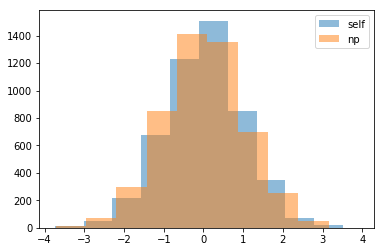

In [108]:
all_x = (np.asarray(all_x).flatten())
print (np.mean(all_x), np.std(all_x))
plt.hist(all_x,alpha=0.5,label='self')
plt.hist(np.random.randn(5000),alpha=0.5,label='np')
plt.legend()
plt.show()



In [127]:
# General slice sampling, with some assumptions
def slice_sampling(x, RNG, pdf, invpdf, num_points=500):
    """
    Given initial x, sample num_points from the PDF
    ASSUMES SYMMETRIC PDF with only 2 points crossing a line
    
    x -- initial value with pdf(x)>0
    RNG -- random number generator that generates number \in [0,1]
    pdf -- pdf of the function to sample from: y(x)
    invpdf -- inverse pdf x(y)
    num_points -- amount of points to sample
    """
    def step2(x):
        # Step 2 on the slide `Slice sampling'
        y = RNG()*pdf(x)
    
        # x is plus or minus this value
        x1 = invpdf(y)
    
        # draw a uniform x on this line segment
        x_draw = RNG()*2*x1 - x1
        
        return x_draw
    
    all_x = []
    for _ in range(num_points):
        x = step2(x)
        all_x.append(x)
    
    return all_x
    

0.007811582851938274 1.005457315242716


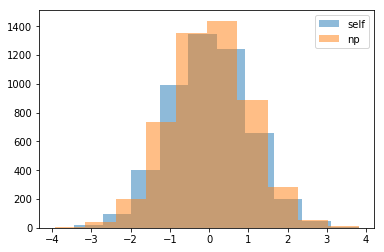

In [131]:
RNG = lambda: np.random.rand(1)[0]
x0 = 0.563
all_x = slice_sampling(x0, RNG, st_normal, inverse_pdfNorm, 5000)
all_x_np = np.random.randn(5000)
print (np.mean(all_x), np.std(all_x))
plt.hist(all_x,alpha=0.5,label='self')
plt.hist(all_x_np,alpha=0.5,label='np')
plt.legend()
plt.show()

In [148]:
# Rejection sampling
def rejection_sampling(RNG, pdf, x_begin, x_end, num_points=500):
    """
    Sample num_points from the PDF by rejection sampling
    
    RNG -- random number generator that generates number \in [0,1]
    pdf -- pdf of the function to sample from: y(x)
    num_points -- amount of points to sample
    x_begin, x_end -- begin and endpoint of uniform dist sample
    """

        
    all_x = []
    factor = x_end-x_begin
    while len(all_x) < num_points:
        x = RNG()*(factor)+x_begin # x between -10 and 10
        y = RNG()
        if y <= pdf(x):
            all_x.append(x)
    
    return all_x

0.006758340734196753 0.9957559424379144


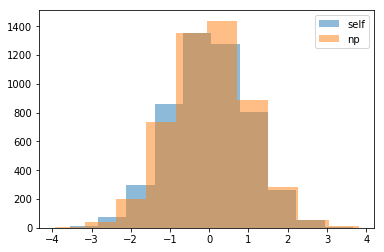

In [150]:
RNG = lambda: np.random.rand(1)[0]

# Larger and larger x_begin and x_end will give better results
# But the function will be slower and slower
x_begin, x_end = -10, 10
all_x = rejection_sampling(x, RNG, st_normal, x_begin, x_end
                                 , 5000)
print (np.mean(all_x), np.std(all_x))
plt.hist(all_x,alpha=0.5,label='self')
plt.hist(all_x_np,alpha=0.5,label='np')
plt.legend()
plt.show()